In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 사이킷런 내장 데이터 셋 API호출

iris=load_iris()

# 넘파이 데이터 셋을 pandas dataframe으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width'] # 컬럼지정
irisDF=pd.DataFrame(iris.data,columns=columns) # irisDF 데이터 프레임 만들기
irisDF['target']=iris.target # 레이블 지정해주기

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o'] #세모,네모, 동그라미
# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scattor plot

<function matplotlib.pyplot.show(close=None, block=None)>

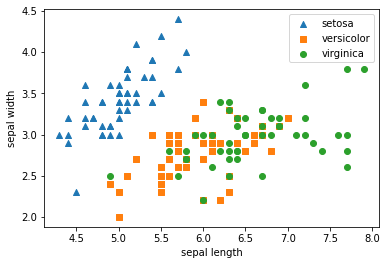

In [16]:
for i , marker in enumerate(markers):
    
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length'] 
    # print(x_axis_data) 
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    # print(y_axis_data)
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show



In [6]:
from sklearn.preprocessing import StandardScaler

iris_scaled= StandardScaler().fit_transform(irisDF)

In [7]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

#fit()과 transform()을 호출하여 PCA변환 데이터 변환

pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

# 차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [12]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']

irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)

irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


<function matplotlib.pyplot.show(close=None, block=None)>

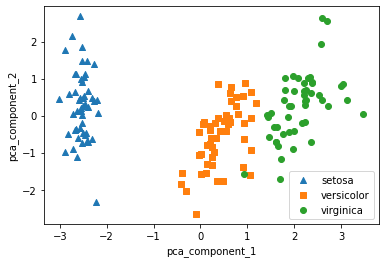

In [13]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o'] #세모,네모, 동그라미

# pca_component_1을 x축,pc_component_2를 y축으로 scatter plot수행.
for i , marker in enumerate(markers):
    
    x_axis_data=irisDF_pca[irisDF['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show
